## Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from prophet.plot import plot_plotly , plot_components_plotly

## Data Processing

In [5]:
data=pd.read_csv("pc_final.csv")

data.head()

Unnamed: 0   Timestamp  PM2.5 \n(µg/m³)  NO2\n (µg/m³)  SO2\n (µg/m³)  \
0         0.0  01-01-2017            89.26          43.59          15.19   
1         1.0  02-01-2017            75.00          56.26          18.19   
2         2.0  03-01-2017            90.83          54.73          27.51   
3         3.0  04-01-2017           100.32          54.99          41.68   
4         4.0  05-01-2017            92.87          52.84          32.06   

   CO\n (mg/m³)  Ozone\n (µg/m³)  Unnamed: 7  sub index\n pm 2.5  \
0          1.40            71.84         NaN          197.533333   
1          1.41            66.12         NaN          150.000000   
2          1.34            66.67         NaN          202.766667   
3          1.23            78.99         NaN          234.400000   
4          1.16            67.64         NaN          209.566667   

   sub index \nNo2  sub index\n So2  sub index\n CO  sub index \nO3  \
0          54.4875          18.9875            70.0           71.84   
1          70.3250          22.7375            70.5           66.12   
2          68.4125          34.3875            67.0           66.67   
3          68.7375          52.1000            61.5           78.99   
4          66.0500          40.0750            58.0           67.64   

   Unnamed: 13  Overall AQI  
0          NaN   197.533333  
1          NaN   150.000000  
2          NaN   202.766667  
3          NaN   234.400000  
4          NaN   209.566667

In [6]:
data.isnull().sum()

Unnamed: 0               1
Timestamp                7
PM2.5 \n(µg/m³)          1
NO2\n (µg/m³)            1
SO2\n (µg/m³)            1
CO\n (mg/m³)             1
Ozone\n (µg/m³)          1
Unnamed: 7            2563
sub index\n pm 2.5       0
sub index \nNo2          0
sub index\n So2          0
sub index\n CO           0
sub index \nO3           0
Unnamed: 13           2563
Overall AQI              0
dtype: int64

In [7]:
data.drop('Unnamed: 7' , inplace = True , axis = 1)
data.drop('Unnamed: 13' , inplace = True , axis = 1)
data.drop('Unnamed: 0' , inplace = True , axis = 1)

In [8]:
data.describe()

PM2.5 \n(µg/m³)  NO2\n (µg/m³)  SO2\n (µg/m³)  CO\n (mg/m³)  \
count      2562.000000    2562.000000    2562.000000   2562.000000   
mean         46.214809      28.704703       8.206924      0.672939   
std          29.047648      16.760407       6.634248      0.295139   
min           0.460000       0.150000       0.020000      0.000000   
25%          23.565000      17.692500       3.850000      0.470000   
50%          43.085000      24.920000       6.425000      0.660000   
75%          63.675000      36.395000      10.700000      0.820000   
max         392.990000     249.800000      93.250000      3.080000   

       Ozone\n (µg/m³)  sub index\n pm 2.5  sub index \nNo2  sub index\n So2  \
count      2562.000000         2563.000000      2563.000000      2563.000000   
mean         26.376409           86.169945        35.809957        10.249914   
std          16.633240           64.225864        20.517396         8.236171   
min           0.080000            0.000000         0.000000         0.000000   
25%          13.095000           39.250000        22.112500         4.806250   
50%          23.335000           71.783333        31.137500         8.012500   
75%          34.772500          112.233333        45.462500        13.362500   
max         117.210000          509.992308       269.800000       104.416667   

       sub index\n CO  sub index \nO3  Overall AQI  
count     2563.000000     2563.000000  2563.000000  
mean        33.599298       26.377182    88.431619  
std         14.552507       16.696996    62.728868  
min          0.000000        0.000000     0.000000  
25%         23.500000       13.090000    41.841667  
50%         33.000000       23.330000    73.100000  
75%         41.000000       34.765000   113.433333  
max        113.500000      125.308824   509.992308

In [120]:
data.drop(data[data["Overall AQI"] >= 400].index, inplace=True)
data.drop(data[data["Overall AQI"] >= 400].index, inplace=True)

In [10]:
data.describe()

PM2.5 \n(µg/m³)  NO2\n (µg/m³)  SO2\n (µg/m³)  CO\n (mg/m³)  \
count      2559.000000    2559.000000    2559.000000   2559.000000   
mean         45.913888      28.717550       8.211266      0.672751   
std          27.615815      16.763917       6.636792      0.295146   
min           0.460000       0.150000       0.020000      0.000000   
25%          23.550000      17.700000       3.850000      0.470000   
50%          43.020000      24.930000       6.450000      0.660000   
75%          63.525000      36.435000      10.715000      0.820000   
max         230.040000     249.800000      93.250000      3.080000   

       Ozone\n (µg/m³)  sub index\n pm 2.5  sub index \nNo2  sub index\n So2  \
count      2559.000000         2560.000000      2560.000000      2560.000000   
mean         26.390817           85.754489        35.825926        10.255329   
std          16.636993           63.082990        20.521418         8.239311   
min           0.080000            0.000000         0.000000         0.000000   
25%          13.110000           39.229167        22.121875         4.809375   
50%          23.390000           71.683333        31.150000         8.056250   
75%          34.780000          111.691667        45.534375        13.390625   
max         117.210000          384.646154       269.800000       104.416667   

       sub index\n CO  sub index \nO3  Overall AQI  
count     2560.000000     2560.000000  2560.000000  
mean        33.589844       26.391585    88.018813  
std         14.552611       16.700807    61.571635  
min          0.000000        0.000000     0.000000  
25%         23.500000       13.105000    41.808333  
50%         33.000000       23.365000    72.975000  
75%         41.000000       34.780000   112.900000  
max        113.500000      125.308824   384.646154

In [11]:


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['PM2.5 \n(µg/m³)'].quantile(0.25)
Q3 = data['PM2.5 \n(µg/m³)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['PM2.5 \n(µg/m³)'] < lower_bound) | (data['PM2.5 \n(µg/m³)'] > upper_bound)]

print("Outliers:")
print(outliers)

# Drop the outliers
df_cleaned = data[~((data['PM2.5 \n(µg/m³)'] < lower_bound) | (data['PM2.5 \n(µg/m³)'] > upper_bound))]

print("\nDataFrame after dropping outliers:")
print(df_cleaned)
data = df_cleaned.copy()

Outliers:
       Timestamp  PM2.5 \n(µg/m³)  NO2\n (µg/m³)  SO2\n (µg/m³)  CO\n (mg/m³)  \
50    20-02-2017           151.28          73.24          27.44          2.80   
57    27-02-2017           124.23          70.03          17.79          1.85   
101   12-04-2017           163.08         106.31          14.59          1.43   
1041  06-11-2019           129.78          52.58          10.31          1.22   
1457  25-12-2020           132.49          58.94           7.64          0.97   
1458  26-12-2020           150.70          72.17          13.12          1.19   
1459  27-12-2020           145.66          73.41          15.63          1.28   
1460  28-12-2020           132.47          68.17          13.26          1.03   
1476  12-01-2021           124.20          81.17          10.10          1.49   
1498  03-02-2021           135.88          65.27           8.66          0.94   
1821  23-12-2021           134.41          39.28           5.41          1.70   
1822  24-12-2021  

In [12]:


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['NO2\n (µg/m³)'].quantile(0.25)
Q3 = data['NO2\n (µg/m³)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['NO2\n (µg/m³)'] < lower_bound) | (data['NO2\n (µg/m³)'] > upper_bound)]

print("Outliers:")
print(outliers)

# Drop the outliers
df_cleaned = data[~((data['NO2\n (µg/m³)'] < lower_bound) | (data['NO2\n (µg/m³)'] > upper_bound))]

print("\nDataFrame after dropping outliers:")
print(df_cleaned)
data = df_cleaned.copy()

Outliers:
       Timestamp  PM2.5 \n(µg/m³)  NO2\n (µg/m³)  SO2\n (µg/m³)  CO\n (mg/m³)  \
5     06-01-2017           116.06          70.36          38.56          1.64   
20    21-01-2017            75.35          67.27           4.77          1.08   
29    30-01-2017            70.24          69.19          10.90          1.43   
30    31-01-2017            96.27          65.31          11.20          1.53   
47    17-02-2017           110.38          70.64          14.16          1.47   
...          ...              ...            ...            ...           ...   
2462  23-09-2023            46.21         249.80          48.40          1.11   
2468  29-09-2023            35.69          79.28          31.90          0.92   
2523  23-11-2023            29.49          73.39           8.04          0.82   
2525  25-11-2023            59.25         121.41           6.41          0.91   
2526  26-11-2023            86.56         110.58           5.99          1.17   

      Ozone\n (µg

In [13]:
data.describe()

PM2.5 \n(µg/m³)  NO2\n (µg/m³)  SO2\n (µg/m³)  CO\n (mg/m³)  \
count      2455.000000    2455.000000    2455.000000   2455.000000   
mean         43.922310      26.852000       7.814542      0.654656   
std          25.104464      13.002569       5.969361      0.277134   
min           0.460000       0.150000       0.020000      0.000000   
25%          22.815000      17.465000       3.785000      0.470000   
50%          41.320000      24.230000       6.270000      0.650000   
75%          61.040000      34.615000       9.880000      0.810000   
max         120.220000      63.840000      79.310000      3.080000   

       Ozone\n (µg/m³)  sub index\n pm 2.5  sub index \nNo2  sub index\n So2  \
count      2455.000000         2456.000000      2456.000000      2456.000000   
mean         26.116175           81.006516        33.551333         9.764200   
std          16.606999           56.945522        16.264009         7.462784   
min           0.080000            0.000000         0.000000         0.000000   
25%          13.040000           37.995833        21.818750         4.725000   
50%          22.910000           68.866667        30.250000         7.837500   
75%          34.580000          103.383333        43.253125        12.343750   
max         117.210000          300.169231        79.800000        99.137500   

       sub index\n CO  sub index \nO3  Overall AQI  
count     2456.000000     2456.000000  2456.000000  
mean        32.695643       26.117088    82.993257  
std         13.708769       16.673657    55.210255  
min          0.000000        0.000000     0.000000  
25%         23.500000       13.037500    41.166667  
50%         32.500000       22.905000    70.341667  
75%         40.500000       34.565000   103.808333  
max        113.500000      125.308824   300.169231

In [14]:
data.head()

Timestamp  PM2.5 \n(µg/m³)  NO2\n (µg/m³)  SO2\n (µg/m³)  CO\n (mg/m³)  \
0  01-01-2017            89.26          43.59          15.19          1.40   
1  02-01-2017            75.00          56.26          18.19          1.41   
2  03-01-2017            90.83          54.73          27.51          1.34   
3  04-01-2017           100.32          54.99          41.68          1.23   
4  05-01-2017            92.87          52.84          32.06          1.16   

   Ozone\n (µg/m³)  sub index\n pm 2.5  sub index \nNo2  sub index\n So2  \
0            71.84          197.533333          54.4875          18.9875   
1            66.12          150.000000          70.3250          22.7375   
2            66.67          202.766667          68.4125          34.3875   
3            78.99          234.400000          68.7375          52.1000   
4            67.64          209.566667          66.0500          40.0750   

   sub index\n CO  sub index \nO3  Overall AQI  
0            70.0           71.84   197.533333  
1            70.5           66.12   150.000000  
2            67.0           66.67   202.766667  
3            61.5           78.99   234.400000  
4            58.0           67.64   209.566667

In [15]:
df = data.copy()

In [16]:
df.columns

Index(['Timestamp', 'PM2.5 \n(µg/m³)', 'NO2\n (µg/m³)', 'SO2\n (µg/m³)',
       'CO\n (mg/m³)', 'Ozone\n (µg/m³)', 'sub index\n pm 2.5',
       'sub index \nNo2', 'sub index\n So2', 'sub index\n CO',
       'sub index \nO3', 'Overall AQI'],
      dtype='object')

In [17]:
df.drop(['PM2.5 \n(µg/m³)', 'NO2\n (µg/m³)', 'SO2\n (µg/m³)',
       'CO\n (mg/m³)', 'Ozone\n (µg/m³)'], inplace = True,axis = 1)

In [18]:
df[0:3]

Timestamp  sub index\n pm 2.5  sub index \nNo2  sub index\n So2  \
0  01-01-2017          197.533333          54.4875          18.9875   
1  02-01-2017          150.000000          70.3250          22.7375   
2  03-01-2017          202.766667          68.4125          34.3875   

   sub index\n CO  sub index \nO3  Overall AQI  
0            70.0           71.84   197.533333  
1            70.5           66.12   150.000000  
2            67.0           66.67   202.766667

In [19]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y')



In [20]:
df['Timestamp'] = df['Timestamp'].dt.strftime('%Y-%m-%d')

### we will be using "df" for PROPHET MODEL
### and "data_x" for ARIMA and SARIMAX MODEL

In [22]:
df.head(5)

#MAKING COPY OF THE DATA
data_x = df.copy()

In [23]:
data_x.isna().sum()

Timestamp             7
sub index\n pm 2.5    0
sub index \nNo2       0
sub index\n So2       0
sub index\n CO        0
sub index \nO3        0
Overall AQI           0
dtype: int64

In [24]:
data_x.head()

Timestamp  sub index\n pm 2.5  sub index \nNo2  sub index\n So2  \
0  2017-01-01          197.533333          54.4875          18.9875   
1  2017-01-02          150.000000          70.3250          22.7375   
2  2017-01-03          202.766667          68.4125          34.3875   
3  2017-01-04          234.400000          68.7375          52.1000   
4  2017-01-05          209.566667          66.0500          40.0750   

   sub index\n CO  sub index \nO3  Overall AQI  
0            70.0           71.84   197.533333  
1            70.5           66.12   150.000000  
2            67.0           66.67   202.766667  
3            61.5           78.99   234.400000  
4            58.0           67.64   209.566667

In [25]:
df.rename(columns={'Timestamp': 'ds', 'Overall AQI': 'y'}, inplace=True)


In [26]:
df.dropna(inplace = True , axis = 0)

In [27]:
df.describe()

sub index\n pm 2.5  sub index \nNo2  sub index\n So2  sub index\n CO  \
count         2449.000000      2449.000000      2449.000000     2449.000000   
mean            81.049368        33.559341         9.766966       32.707023   
std             57.003015        16.272714         7.470799       13.712379   
min              0.766667         0.187500         0.025000        0.000000   
25%             37.983333        21.800000         4.725000       23.500000   
50%             68.850000        30.175000         7.825000       32.500000   
75%            103.666667        43.312500        12.375000       40.500000   
max            300.169231        79.800000        99.137500      113.500000   

       sub index \nO3            y  
count     2449.000000  2449.000000  
mean        26.127108    83.041788  
std         16.689125    55.262871  
min          0.080000     0.910000  
25%         13.030000    41.166667  
50%         22.870000    70.233333  
75%         34.610000   103.833333  
max        125.308824   300.169231

In [28]:
data_x.set_index("Timestamp", inplace = True)

<Axes: xlabel='Timestamp'>

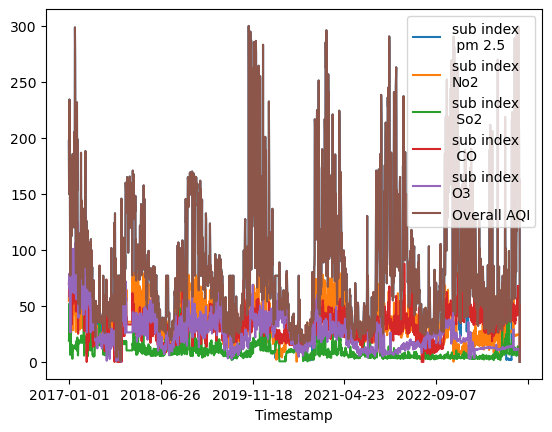

In [29]:
data_x.plot()

In [30]:
#Testing for stationarity

from statsmodels.tsa.stattools import adfuller


In [31]:
test_result = adfuller(data_x["Overall AQI"])

In [32]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [33]:
adfuller_test(data_x["Overall AQI"])

ADF Test Statistic : -4.400409059874195
p-value : 0.0002963382188119905
#Lags Used : 26
Number of Observations Used : 2429
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [34]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data_x["Overall AQI"] , trace = True , suppress_warnings = True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=23921.714, Time=1.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=26675.588, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=24098.230, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25264.198, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29576.359, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=23972.946, Time=0.82 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=23921.236, Time=1.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=24014.459, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=24038.533, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=23921.741, Time=1.80 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=24009.867, Time=0.25 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=23933.704, Time=0.47 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 9.368 seconds


### from above we see that best model (p,d,q) comes as = ARIMA(2,0,1)

In [36]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [37]:
print(data_x.shape)
train_x = data_x.iloc[:-180]
test_x = data_x.iloc[-180 :]
print(train_x.shape , test_x.shape)

(2456, 6)
(2276, 6) (180, 6)


In [38]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_x["Overall AQI"], order=(2,0,1))
model = model.fit()
model.summary()


C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dat

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Overall AQI   No. Observations:                 2276
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -10921.883
Date:                Thu, 29 Aug 2024   AIC                          21853.766
Time:                        14:55:52   BIC                          21882.417
Sample:                             0   HQIC                         21864.217
                               - 2276                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.4631     15.998      5.217      0.000      52.109     114.818
ar.L1          1.5552      0.019     84.020      0.000       1.519       1.591
ar.L2         -0.5610      0.017    -32.435      0.000      -0.595      -0.527
ma.L1         -0.8942      0.013    -70.890      0.000      -0.919      -0.870
sigma2       861.6739     13.590     63.403      0.000     835.037     888.311
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):              7644.62
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                             1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
start = len(train_x)

end = len(train_x)+len(test_x) -1


pred= model.predict(start = start , end = end , typ = "levels")

pred.index = data_x.index[start:end+1]
print(pred)

Timestamp
2023-06-23    50.398886
2023-06-24    52.247188
2023-06-25    53.467184
2023-06-26    54.327522
2023-06-27    54.981036
                ...    
2023-12-28    80.755981
2023-12-29    80.792790
2023-12-30    80.829098
2023-12-31    80.864912
NaN           80.900240
Name: predicted_mean, Length: 180, dtype: float64


C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Timestamp'>

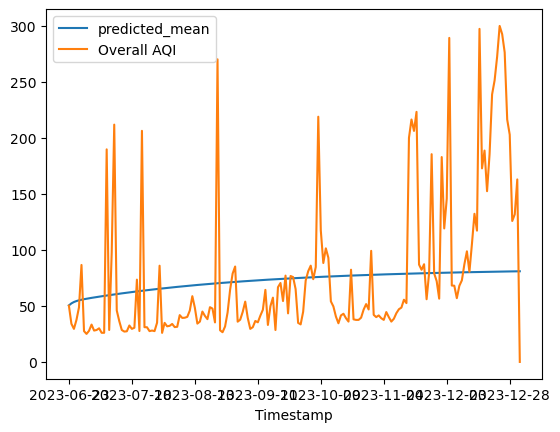

In [40]:
pred.plot(legend = True)
test_x["Overall AQI"].plot(legend = True)

In [41]:
test_x["Overall AQI"].mean()

77.34736111205555

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test_x["Overall AQI"]))
print(rmse)

64.29007539702465


In [43]:
#now retraining the model on the entire dataset and predicting values for the next 50 days
model2 = ARIMA(data_x["Overall AQI"] , order = (2,0,1))
model2 = model2.fit()
data_x.tail()

C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dat

sub index\n pm 2.5  sub index \nNo2  sub index\n So2  \
Timestamp                                                          
2023-12-28          202.800000          24.6500            6.375   
2023-12-29          125.766667          24.2500            7.850   
2023-12-30          131.733333          24.5875            7.825   
2023-12-31          162.866667          24.7125            7.375   
NaN                   0.000000           0.0000            0.000   

            sub index\n CO  sub index \nO3  Overall AQI  
Timestamp                                                
2023-12-28            51.0           11.74   202.800000  
2023-12-29            46.0           11.40   125.766667  
2023-12-30            46.0           11.59   131.733333  
2023-12-31            51.0           11.76   162.866667  
NaN                    0.0            0.00     0.000000

In [44]:
index_future_dates = pd.date_range(start = "2023-12-31",end ="2024-02-20")
pred=  model2.predict(start = len(data_x),end = len(data_x)+51).rename("ARIMA Productions")
pred.index = index_future_dates
print(pred)

2023-12-31     63.785245
2024-01-01     97.361973
2024-01-02    114.869085
2024-01-03    123.830292
2024-01-04    128.249136
2024-01-05    130.255961
2024-01-06    130.984322
2024-01-07    131.037345
2024-01-08    130.735904
2024-01-09    130.250671
2024-01-10    129.672399
2024-01-11    129.049310
2024-01-12    128.406995
2024-01-13    127.759005
2024-01-14    127.112483
2024-01-15    126.471165
2024-01-16    125.836974
2024-01-17    125.210871
2024-01-18    124.593301
2024-01-19    123.984442
2024-01-20    123.384326
2024-01-21    122.792910
2024-01-22    122.210113
2024-01-23    121.635831
2024-01-24    121.069953
2024-01-25    120.512363
2024-01-26    119.962943
2024-01-27    119.421574
2024-01-28    118.888140
2024-01-29    118.362526
2024-01-30    117.844616
2024-01-31    117.334298
2024-02-01    116.831461
2024-02-02    116.335996
2024-02-03    115.847793
2024-02-04    115.366747
2024-02-05    114.892753
2024-02-06    114.425707
2024-02-07    113.965508
2024-02-08    113.512054


C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Parth Chauhan\anaconda2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# USE OF - 1. PROPHET MODEL 

<Axes: xlabel='ds'>

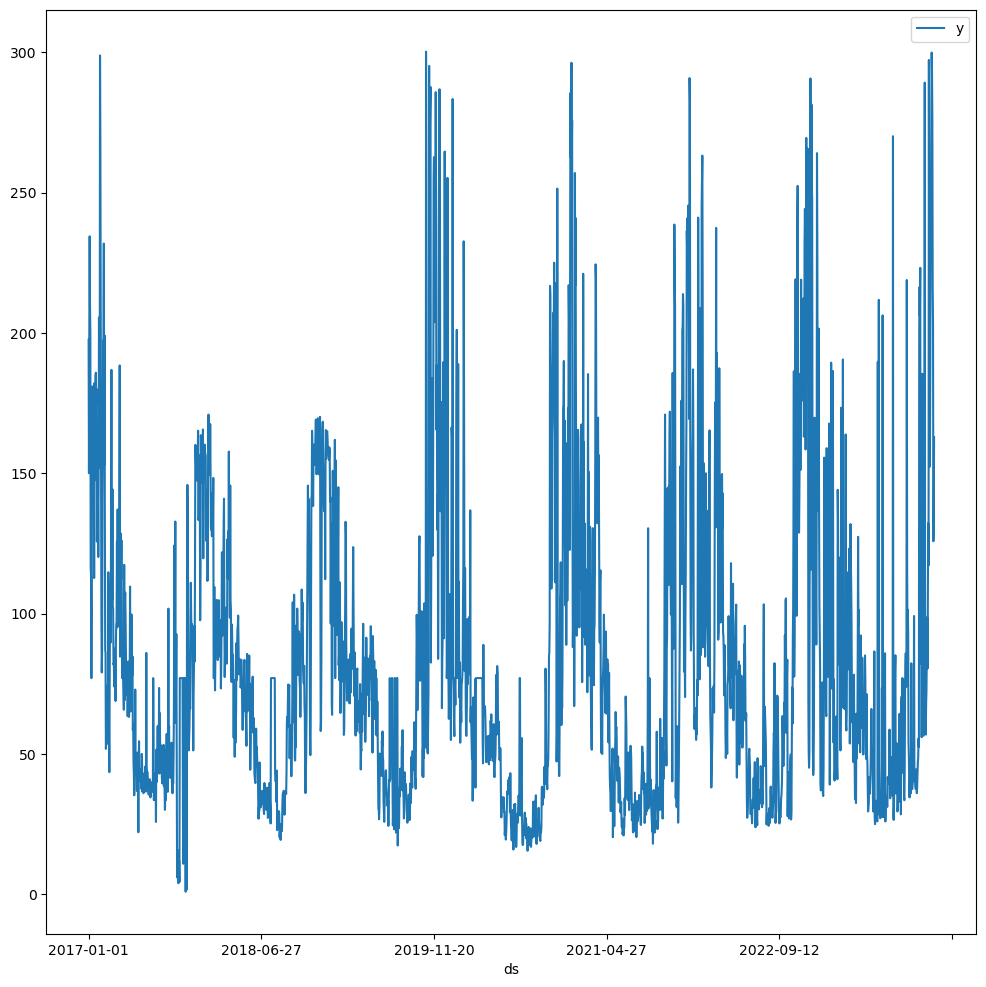

In [46]:
df.plot(x = "ds" , y = "y" , figsize = (12,12))

In [47]:
len(df)


2449

In [48]:
train = df.iloc[:len(df) - 365]
test = df.iloc[len(df) - 365:]

In [49]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

14:55:54 - cmdstanpy - INFO - Chain [1] start processing
14:55:54 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
forecast.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2444 2023-12-06  109.148370  138.928338  231.748611   106.959029   111.566187   
2445 2023-12-07  109.179487  140.104902  227.798573   106.969613   111.607666   
2446 2023-12-08  109.210605  138.323325  229.826259   106.988975   111.647476   
2447 2023-12-09  109.241722  134.949340  230.817022   107.016378   111.686332   
2448 2023-12-10  109.272839  143.195890  234.288537   107.044576   111.720927   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2444       76.018650             76.018650             76.018650  2.519032   
2445       74.693848             74.693848             74.693848 -0.342283   
2446       75.232082             75.232082             75.232082 -1.205894   
2447       76.397246             76.397246             76.397246 -1.292293   
2448       79.479602             79.479602             79.479602  0.702083   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
2444      2.519032      2.519032  73.499618     73.499618     73.499618   
2445     -0.342283     -0.342283  75.036131     75.036131     75.036131   
2446     -1.205894     -1.205894  76.437976     76.437976     76.437976   
2447     -1.292293     -1.292293  77.689539     77.689539     77.689539   
2448      0.702083      0.702083  78.777520     78.777520     78.777520   

      multiplicative_terms  multiplicative_terms_lower  \
2444                   0.0                         0.0   
2445                   0.0                         0.0   
2446                   0.0                         0.0   
2447                   0.0                         0.0   
2448                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
2444                         0.0  185.167021  
2445                         0.0  183.873335  
2446                         0.0  184.442686  
2447                         0.0  185.638968  
2448                         0.0  188.752442

In [51]:
test.tail()

ds  sub index\n pm 2.5  sub index \nNo2  sub index\n So2  \
2557  2023-12-27          216.266667          23.9500            7.300   
2558  2023-12-28          202.800000          24.6500            6.375   
2559  2023-12-29          125.766667          24.2500            7.850   
2560  2023-12-30          131.733333          24.5875            7.825   
2561  2023-12-31          162.866667          24.7125            7.375   

      sub index\n CO  sub index \nO3           y  
2557            53.5           11.15  216.266667  
2558            51.0           11.74  202.800000  
2559            46.0           11.40  125.766667  
2560            46.0           11.59  131.733333  
2561            51.0           11.76  162.866667

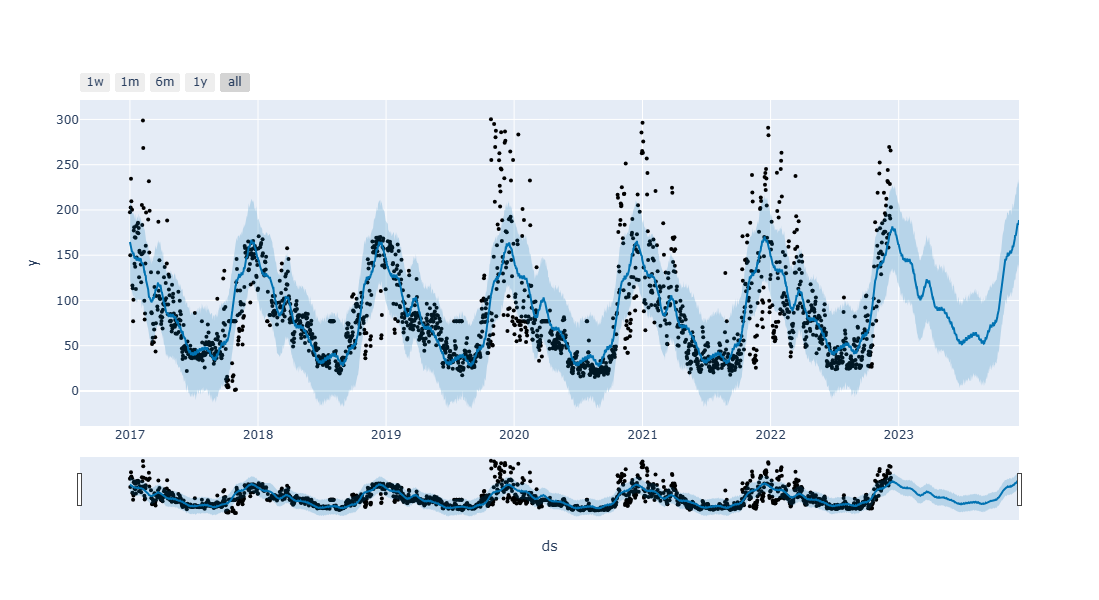

In [52]:
plot_plotly(m , forecast)

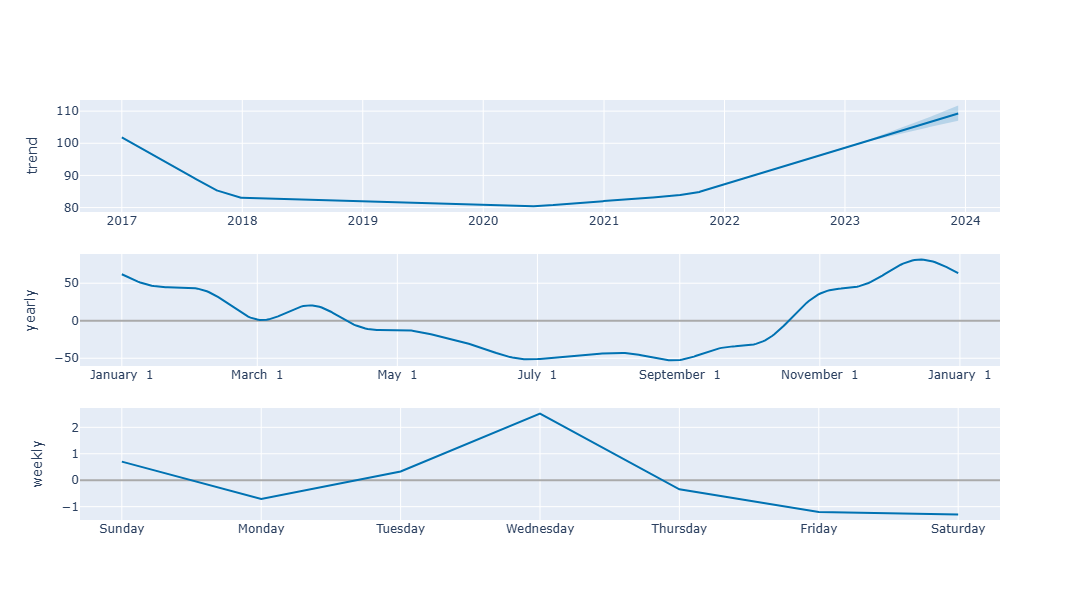

In [53]:
plot_components_plotly(m , forecast)

### Evaluation of the model:-

In [55]:
from statsmodels.tools.eval_measures import rmse

In [56]:
predictions = forecast.iloc[-365:]["yhat"]

In [57]:
print("Root mean squared error between actual and predicted values : " ,rmse(predictions , test["y"]))
print("Mean value of the test dataset : ",test["y"].mean())

Root mean squared error between actual and predicted values :  53.158864198720686
Mean value of the test dataset :  82.67267123265754


## lets train the model with the complete data

14:55:56 - cmdstanpy - INFO - Chain [1] start processing
14:55:56 - cmdstanpy - INFO - Chain [1] done processing


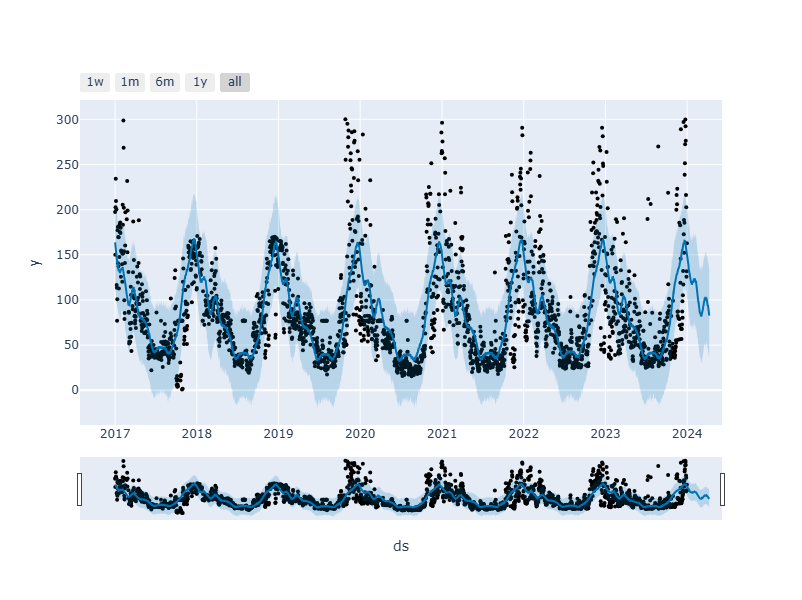

In [59]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods = 100)
forecast = m.predict(future)

plot_plotly(m , forecast)


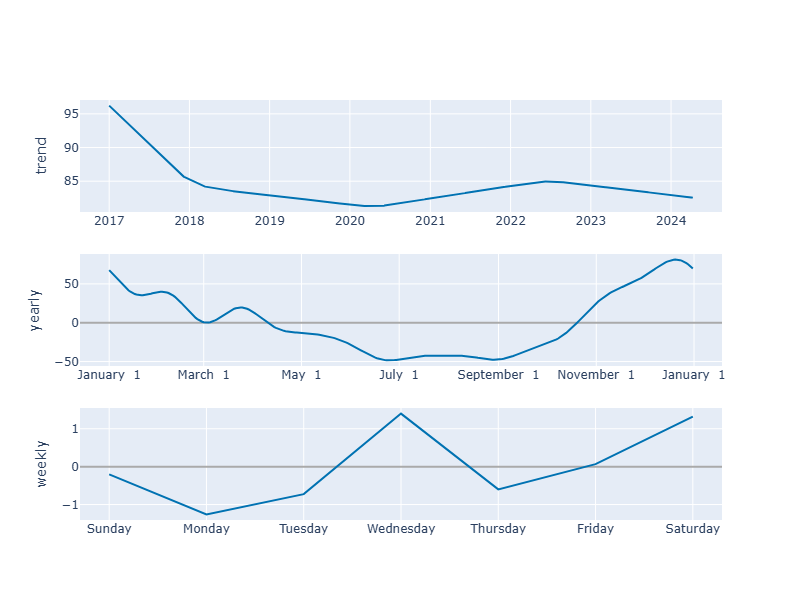

In [60]:
plot_components_plotly(m , forecast)

In [61]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2017-01-01  96.225851  112.406661  212.588943    96.225851    96.225851   
1    2017-01-02  96.194196  110.799812  209.361235    96.194196    96.194196   
2    2017-01-03  96.162541  107.924227  206.881345    96.162541    96.162541   
3    2017-01-04  96.130886  110.589049  208.280641    96.130886    96.130886   
4    2017-01-05  96.099232   99.746582  205.240414    96.099232    96.099232   
...         ...        ...         ...         ...          ...          ...   
2544 2024-04-05  82.575579   42.995214  137.989974    82.478614    82.687393   
2545 2024-04-06  82.571712   42.280174  141.783623    82.471878    82.683851   
2546 2024-04-07  82.567845   37.940039  137.654140    82.465260    82.680567   
2547 2024-04-08  82.563978   37.892117  134.782430    82.459118    82.680656   
2548 2024-04-09  82.560111   33.873195  132.971323    82.452545    82.679677   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0          67.531917             67.531917             67.531917 -0.203913   
1          64.282761             64.282761             64.282761 -1.260164   
2          62.542340             62.542340             62.542340 -0.725108   
3          62.335192             62.335192             62.335192  1.400381   
4          57.971520             57.971520             57.971520 -0.600026   
...              ...                   ...                   ...       ...   
2544        7.163462              7.163462              7.163462  0.066237   
2545        6.801593              6.801593              6.801593  1.322594   
2546        3.663981              3.663981              3.663981 -0.203913   
2547        1.022749              1.022749              1.022749 -1.260164   
2548        0.016291              0.016291              0.016291 -0.725108   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0        -0.203913     -0.203913  67.735830     67.735830     67.735830   
1        -1.260164     -1.260164  65.542925     65.542925     65.542925   
2        -0.725108     -0.725108  63.267448     63.267448     63.267448   
3         1.400381      1.400381  60.934812     60.934812     60.934812   
4        -0.600026     -0.600026  58.571546     58.571546     58.571546   
...            ...           ...        ...           ...           ...   
2544      0.066237      0.066237   7.097226      7.097226      7.097226   
2545      1.322594      1.322594   5.478999      5.478999      5.478999   
2546     -0.203913     -0.203913   3.867894      3.867894      3.867894   
2547     -1.260164     -1.260164   2.282913      2.282913      2.282913   
2548     -0.725108     -0.725108   0.741399      0.741399      0.741399   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
2544                   0.0                         0.0   
2545                   0.0                         0.0   
2546                   0.0                         0.0   
2547                   0.0                         0.0   
2548                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0  163.757768  
1                            0.0  160.476957  
2                            0.0  158.704881  
3                            0.0  158.466079  
4                            0.0  154.070751  
...                          ...         ...  
2544                         0.0   89.739042  
2545                         0.0   89.373305  
2546                         0.0   86.231826  
2547                         0.0   83.586727  


In [62]:
forecast[["ds" , "yhat"]][-60:]

ds        yhat
2489 2024-02-10  119.973617
2490 2024-02-11  117.045327
2491 2024-02-12  114.395943
2492 2024-02-13  113.161981
2493 2024-02-14  113.362039
2494 2024-02-15  109.302892
2495 2024-02-16  107.803383
2496 2024-02-17  106.815854
2497 2024-02-18  102.998324
2498 2024-02-19   99.636306
2499 2024-02-20   97.884003
2500 2024-02-21   97.773762
2501 2024-02-22   93.621860
2502 2024-02-23   92.252176
2503 2024-02-24   91.617510
2504 2024-02-25   88.371732
2505 2024-02-26   85.791692
2506 2024-02-27   85.018587
2507 2024-02-28   86.067694
2508 2024-02-29   83.234519
2509 2024-03-01   83.318912
2510 2024-03-02   84.246898
2511 2024-03-03   82.643401
2512 2024-03-04   81.754767
2513 2024-03-05   82.690782
2514 2024-03-06   85.435067
2515 2024-03-07   84.251892
2516 2024-03-08   85.910944
2517 2024-03-09   88.309779
2518 2024-03-10   88.047127
2519 2024-03-11   88.345940
2520 2024-03-12   90.295869
2521 2024-03-13   93.864041
2522 2024-03-14   93.302169
2523 2024-03-15   95.371533
2524 2024-03-16   97.965540
2525 2024-03-17   97.683054
2526 2024-03-18   97.751367
2527 2024-03-19   99.268507
2528 2024-03-20  102.213767
2529 2024-03-21  100.854487
2530 2024-03-22  101.970626
2531 2024-03-23  103.476873
2532 2024-03-24  101.995463
2533 2024-03-25  100.778604
2534 2024-03-26  100.950230
2535 2024-03-27  102.515950
2536 2024-03-28   99.769266
2537 2024-03-29   99.515596
2538 2024-03-30   99.693869
2539 2024-03-31   96.948862
2540 2024-04-01   94.553211
2541 2024-04-02   93.648790
2542 2024-04-03   94.256378
2543 2024-04-04   90.681647
2544 2024-04-05   89.739042
2545 2024-04-06   89.373305
2546 2024-04-07   86.231826
2547 2024-04-08   83.586727
2548 2024-04-09   82.576402